# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/berrakarayel/Desktop/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

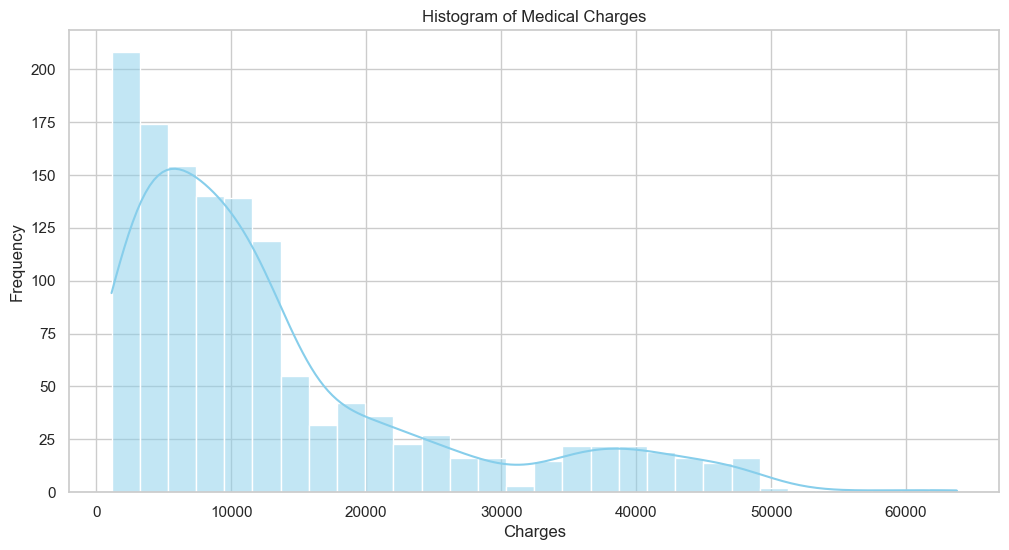

Mean Medical Charges: $13270.42
Standard Deviation of Medical Charges: $12110.01


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the histogram of medical charges
plt.figure(figsize=(12, 6))
sns.histplot(medical['charges'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)  # Using ddof=1 for Bessel's correction

# Print the mean and standard deviation
print(f"Mean Medical Charges: ${mean_charges:.2f}")
print(f"Standard Deviation of Medical Charges: ${std_charges:.2f}")

According to the histogram, the distribution appears as right-skewed, with a long tail towards higher charges. This suggests that there are some patients with significantly higher charges. Mean and stadard deviation are sensitive to extreme values. In this case, the mean might not be a robust measure of central tendency, since the distribution is right-skewed due to extreme values and these extreme values pulling the mean towards higher values. Besides, standart deviation may not fully capture the variability due to outliers.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To address the concerns of administrator that the actual average charge has fallen below 12,000 dollars, we can perform a hypothesis test. The most appropriate frequentist test for this scenario would be a one-sample t-test. The one-sample t-test is suitable when we have a single group and want to test whether the mean of that group is different from a specified value. We are comparing the mean medical charges to a specific value which is 12,000 and we want to test if the mean charge is less than $12,000.

**Null Hypothesis:** The actual average charge is equal to or above 12,000 dollars.

**Alternative Hypothesis:** The actual average charge has fallen below $12,000.

Once we perform the one-sample t-test, we can assess whether there is sufficient evidence to reject the null hypothesis in favor of the alternative, providing insight into the administrator's concern.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given the administrator's concern that the actual average charge has fallen below 12,000 dollars, a one-sided confidence interval is appropriate. This is because the administrator is primarily interested in knowing if the mean medical charges have fallen below the key threshold (less than $12,000).

In [7]:
# Set the threshold for concern
threshold = 12000

# Calculate the critical value for a one-sided 95% confidence interval
t_critical = t.ppf(0.95, df=len(medical['charges']) - 1)

# Calculate the standard error of the mean
se_mean = std_charges / np.sqrt(len(medical['charges']))

# Calculate the margin of error for the one-sided confidence interval
margin_of_error_one_sided = t_critical * se_mean

# Calculate the one-sided confidence interval
confidence_interval_one_sided = (mean_charges - margin_of_error_one_sided, np.inf)

# Print the results
print(f"Critical Value for 95% One-Sided Confidence Interval: {t_critical:.3f}")
print(f"One-Sided Confidence Interval for the Mean: (${confidence_interval_one_sided[0]:.2f}, ∞)")

# Check if the threshold is below the confidence interval
if threshold < confidence_interval_one_sided[0]:
    print("\nThe administrator should be concerned as the threshold is below the lower bound of the confidence interval.")
else:
    print("\nThe administrator may not need to be concerned as the threshold is within the confidence interval.")


Critical Value for 95% One-Sided Confidence Interval: 1.646
One-Sided Confidence Interval for the Mean: ($12725.49, ∞)

The administrator should be concerned as the threshold is below the lower bound of the confidence interval.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ **Null Hypothesis:** There is no significant difference in the mean charges between people with insurance and people without insurance.

**Alternative Hypothesis:** There is a significant difference in the mean charges between people with insurance and people without insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
### Manual Calculation


# Separate the data into two groups: with insurance and without insurance
group_0 = medical[medical['insuranceclaim'] == 1]['charges']
group_1 = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate the sample means
mean_0 = np.mean(group_0)
mean_1 = np.mean(group_1)

# Calculate the sample standard deviations
std_0 = np.std(group_0, ddof=1)
std_1 = np.std(group_1, ddof=1)

# Calculate the sizes of the groups
n_0 = len(group_0)
n_1 = len(group_1)

# Calculate the pooled standard deviation
sp = np.sqrt(((n_0 - 1) * std_0**2 + (n_1 - 1) * std_1**2) / (n_0 + n_1 - 2))

# Calculate the t-test statistic
t_statistic = (mean_0 - mean_1) / (sp * np.sqrt(1/n_0 + 1/n_1))

# Calculate the degrees of freedom
df = n_0 + n_1 - 2

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Print the results
print(f"Manual Calculation - t-statistic: {t_statistic:.3f}")
print(f"Manual Calculation - p-value: {p_value:.4f}")

Manual Calculation - t-statistic: 11.893
Manual Calculation - p-value: 0.0000


In [9]:
### Using appropriate function

from scipy.stats import ttest_ind

# Perform the t-test using scipy.stats function
t_statistic_scipy, p_value_scipy = ttest_ind(group_0, group_1)

# Print the results
print(f"scipy.stats Calculation - t-statistic: {t_statistic_scipy:.3f}")
print(f"scipy.stats Calculation - p-value: {p_value_scipy:.4f}")

scipy.stats Calculation - t-statistic: 11.893
scipy.stats Calculation - p-value: 0.0000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ In scipy.stats, there isn't a direct equivalent function for performing a z-test from a sample like there is for a t-test. The reason for this is that z-tests are typically applied when we know the population standard deviation, and it's more common to use t-tests when dealing with sample data.

While scipy.stats doesn't have a direct function for a z-test from a sample, we can achieve the same result by using the zscore function to calculate the z-scores manually and then computing the p-value using the standard normal distribution.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test